In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

In [6]:
# Load the dataset
df = pd.read_csv("input/spamorham.csv")

# Preprocessing the data

In [40]:
print(df.shape)
df.dropna()
print(df.shape)

(20348, 2)
(20348, 2)


In [80]:

# "text" column contains the message text and "text_type" contains the labels (spam or not)
X = df['text']
y = df['text_type']

# Convert labels to numerical values
le = LabelEncoder()
y = le.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize the text data
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(X_train)

# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to make them uniform length
max_sequence_length = 150  # Choose the maximum length of sequences
X_train_pad = tf.keras.preprocessing.sequence.pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_test_pad = tf.keras.preprocessing.sequence.pad_sequences(X_test_seq, maxlen=max_sequence_length)

# Create model

In [81]:
# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=64, input_length=max_sequence_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_pad, y_train, epochs=10, batch_size=32, validation_data=(X_test_pad, y_test))

Epoch 1/10


w:\__Projects__\Deep-Learning-Experiments\.venv\Lib\site-packages\keras\src\layers\core\embedding.py:86: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


509/509 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.7278 - loss: 0.5366 - val_accuracy: 0.9388 - val_loss: 0.2169
Epoch 2/10
509/509 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9265 - loss: 0.2000 - val_accuracy: 0.9428 - val_loss: 0.1490
Epoch 3/10
509/509 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.9532 - loss: 0.1311 - val_accuracy: 0.9533 - val_loss: 0.1270
Epoch 4/10
509/509 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.9660 - loss: 0.0974 - val_accuracy: 0.9651 - val_loss: 0.1205
Epoch 5/10
509/509 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9712 - loss: 0.0860 - val_accuracy: 0.9639 - val_loss: 0.1274
Epoch 6/10
509/509 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.9803 - loss: 0.0598 - val_accuracy: 0.9521 - val_loss: 0.1472
Epoch 7/10
509/509 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.9755 - loss: 0.0738 - val_accuracy: 0.9634 - val_loss: 0.1140
Epoch 8/10
509/509 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.9826 - loss: 0.0521 - val_accurac

In [84]:
#display the model summary
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 150, 64)        │     3,635,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_3      │ (None, 64)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,918,853 (41.65 MB)

 Trainable params: 3,639,617 (13.88 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,279,236 (27.77 MB)

## Save & Load the model

In [82]:
#Save the model
model.save("output/spam_or_ham_model.keras")

In [83]:
#Load the model
model = tf.keras.models.load_model("output/spam_or_ham_model.keras")

# Evaluate the model

Evaluation of the model should be done on the test set, which is not available to us. Therefore, we will split the training data into training and validation sets. We will use the validation set to tune the hyperparameters of the model.

In [85]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_pad, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Further evaluation metrics
y_pred = model.predict(X_test_pad)
y_pred = (y_pred > 0.5) # Convert the probabilities to binary predictions

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step - accuracy: 0.9657 - loss: 0.1182
Test Loss: 0.13205815851688385
Test Accuracy: 0.9601965546607971
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


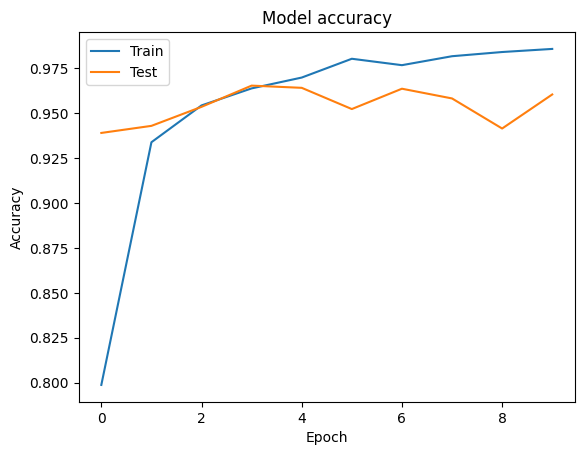

In [87]:
#visualize the loss and accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2913
           1       0.96      0.90      0.93      1157

    accuracy                           0.96      4070
   macro avg       0.96      0.94      0.95      4070
weighted avg       0.96      0.96      0.96      4070



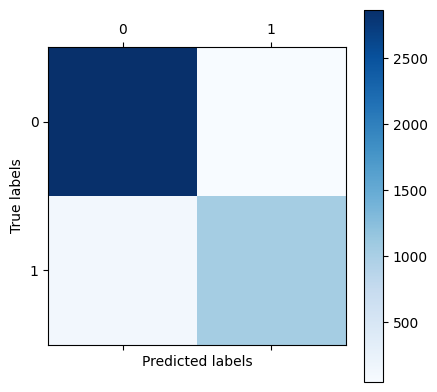

In [89]:
#classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

#visualize the classification report
cm = confusion_matrix(y_test, y_pred)
plt.matshow(cm, cmap=plt.cm.Blues)
plt.colorbar()
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

In [53]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[2856   57]
 [ 113 1044]]


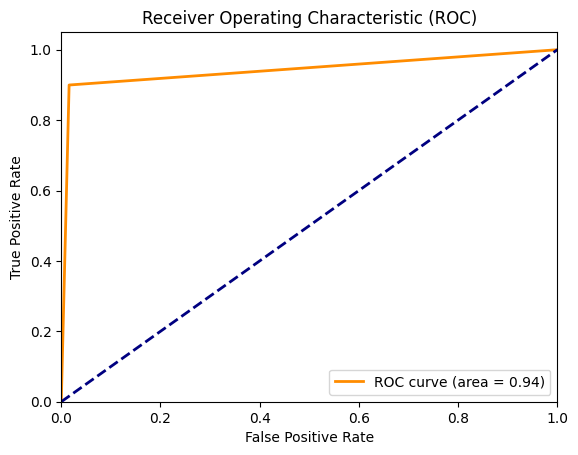

In [90]:
#ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

Average Precision Score: 0.890166433457421


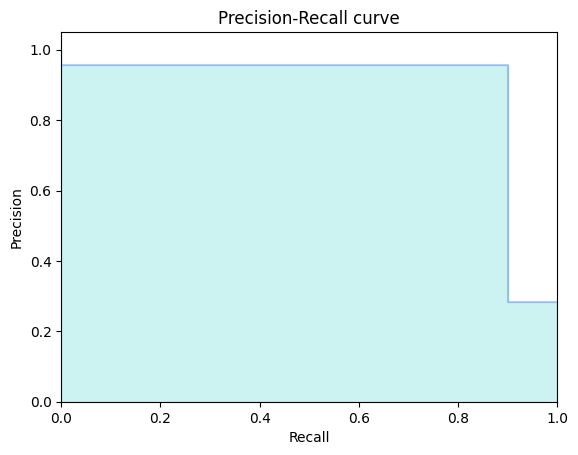

In [91]:
# average precision score
average_precision = average_precision_score(y_test, y_pred)
print("Average Precision Score:", average_precision)

# Precision-Recall curve 
# Precision: the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives
# Recall: the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives

precision, recall, thresholds = precision_recall_curve(y_test, y_pred) # Compute precision-recall pairs for different probability thresholds
plt.figure()
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='c')
plt.xlabel('Recall') 
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve')
plt.show()

## Evaluate with user defined test sets

In [107]:
my_text="Here is an easy way to make a lot of money quick. Click here to learn more."

In [108]:
# Example of classifying a new text_message
#new_text_message = ["Your new text_message text goes here"]
new_text_message = [my_text]
new_text_message_seq = tokenizer.texts_to_sequences(new_text_message)
new_text_message_pad = pad_sequences(new_text_message_seq, maxlen=max_sequence_length)
prediction = model.predict(new_text_message_pad)


print("The text message is: ", new_text_message)
#Print the prediction (0 = ham, 1 = spam) and print the accuracy of the model
if prediction[0][0] >= 0.5:
    print("The text message is spam.")
    #print accuracy of the model
    print("At accuracy: ", accuracy)
    #print how sure it is that the text message is spam
    print("the model is ", prediction[0][0]*100, "% sure that the text message is spam.")
    
else:
    print("The text message is ham.")
    #print accuracy of the model
    print("At accuracy: ", accuracy)
    #print how sure it is that the text message is ham
    print("the model is ", (1-prediction[0][0])*100, "% sure that the text message is not spam (ham).")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
The text message is:  ['Here is an easy way to make a lot of money quick. Click here to learn more.']
The text message is spam.
At accuracy:  0.9601965546607971
the model is  99.23561215400696 % sure that the text message is spam.


# Data analysis and visualization

In [64]:
# show percentage of spam and ham in the dataset
print("Percentage of spam in the dataset: ", (sum(y)/len(y))*100, "%")
print("Percentage of ham in the dataset: ", ((len(y)-sum(y))/len(y))*100, "%")

# show percentage of spam and ham in the test set
print("Percentage of spam in the test set: ", (sum(y_test)/len(y_test))*100, "%")
print("Percentage of ham in the test set: ", ((len(y_test)-sum(y_test))/len(y_test))*100, "%")

# show percentage of spam and ham in the training set
print("Percentage of spam in the training set: ", (sum(y_train)/len(y_train))*100, "%")
print("Percentage of ham in the training set: ", ((len(y_train)-sum(y_train))/len(y_train))*100, "%")

Percentage of spam in the dataset:  29.5409868291724 %
Percentage of ham in the dataset:  70.4590131708276 %
Percentage of spam in the test set:  28.42751842751843 %
Percentage of ham in the test set:  71.57248157248158 %
Percentage of spam in the training set:  29.819388131220055 %
Percentage of ham in the training set:  70.18061186877995 %


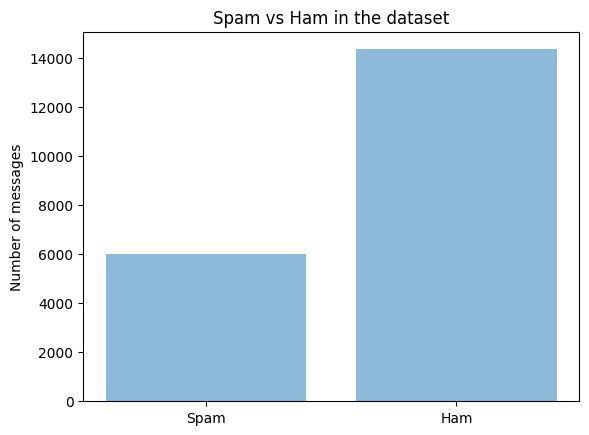

In [67]:
# show a graph of the percentage of spam and ham in the dataset
objects = ('Spam', 'Ham')
y_pos = np.arange(len(objects))
performance = [sum(y), len(y)-sum(y)]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number of messages')
plt.title('Spam vs Ham in the dataset')
plt.show()

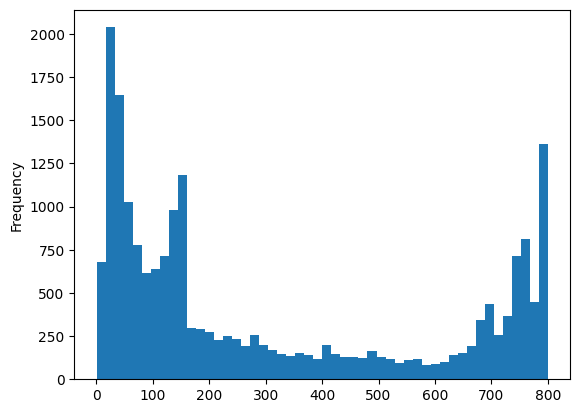

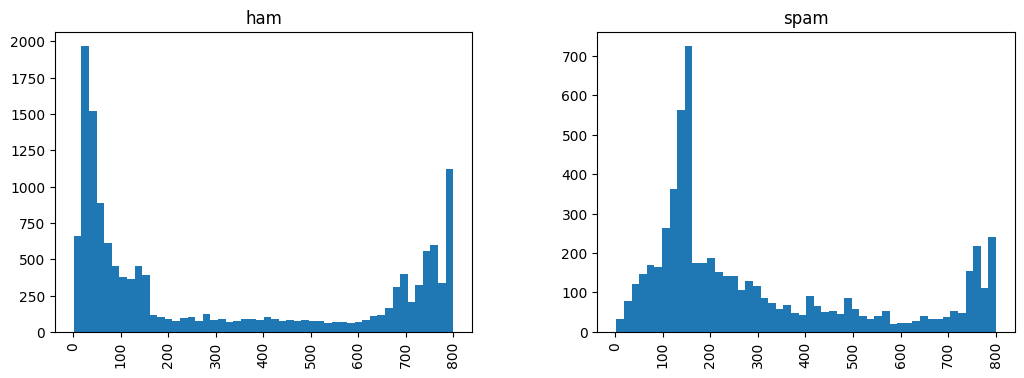

In [79]:
# visualize the length of the messages in the dataset
df['length'] = df['text'].apply(len)
df['length'].plot(bins=50, kind='hist')
plt.show()

#visualize the length of spam and ham messages in the dataset
df.hist(column='length', by='text_type', bins=50,figsize=(12,4))
plt.show()